### **Percolación** 

**Los pasos que se han hecho son los siguientes:**


**1. Crear una matriz de tamaño $N×N$, donde los sitios pueden tomar los valores $1$ (ocupado) con probabilidad $p$, y $0$ (vacio) con probabilidad $(1 − p)$.**


**2. Comprobar si la matriz percola. Para esto, considerar la primera columna de la matriz (izquierda) y cambiar los $1$ por $−1$. Estos representarán el foco que se propaga de un lado al otro. Estos focos se propagan a la siguiente columna (vecinos a la derecha), pasando a ser focos incativos (darle el valor $-10$ para identificarlos). A continuación, considerar los focos activos en las siguientes columnas de forma sucesiva, cado uno de los cuales se propaga hacia sus vecinos (en caso de estar ocupados). En caso de que el proceso de propagación llegue a la última columnam se dira que el sistema ha percolado.**


**3. Calculamos la probabilidad $p$ de ocupación**



In [8]:
from numpy import zeros,arange
from numpy.random import random,seed
from matplotlib.pyplot import imshow,show

# CREAMOS LA MATRIZ INCIAL
def G_percol(G,N,p):
    G_per=0 #VAMOS A IR SUMANDO LOS VECES QUE QUEMA HASTA LA ÚLTIMA COLUMNA
    for i in range(G): #BUCLE PARA REPETIR EL EXPERIMENTO TANTAS VECES COMO QUERAMOS
        percola=0
        M=zeros([N,N],float)
        quemado=0 #para ver si ha quemado dentro del for i, for j que haremos después

        for i in range(N): #CREAMOS LA MATRIZ CON LOS ÁRBOLES
            for j in range(N):
                prob=random(1)
                if prob<=p:
                    M[i,j]=1
                else:
                    M[i,j]=0

        # QUEMAMOS LA PRIMERA COLUMNA
        for i in range(N):
            if M[i,0]==1:
                M[i,0]=-1

        while True: #este true nos va a servir para interrumpir si llega al final o si ya no puede quemar más

            quemado=0 #para que cada vez que empiece diga que no ha quemado todavía

            for i in range(N): #PARA IR POR CADA UNA DE LAS FILAS
                for j in range(N-1):  #PARA IR CAMBIANDO DE COLUMNA
                    #motivo por el q hemos decidido ir por cada una de las filas y no por cada una de las columnas, si vamos por filas, cuando la probabilidad sea alta quemará directamente al final con la primera fila, y no hará falta quemar todas las otras filas,
                    #en cambio si vamos por columnas, tendremos que tener en cuenta todos los puntos hasta llegar a la última columna, siendo un proceso más lento
                    
                    if M[i,j]==-1: #punto que puede propagar el incendio

                        #quema hacia atrás
                        if j>0 and M[i,j-1]==1: #la condición de j>0 es para que en la primera columna no queme la última al ir para atrás
                            M[i,j-1]=-1
                            quemado=1 #ha quemado por lo q tiene q hacer repeticion luego para ver si este quema
                            #ESTO SOLO HAY Q TENERLO EN CUENTA SI SUBE O VA PARA ATRÁS, PORQUE SI HACE PASO PARA ALANTE USARÁ ESE PUNTO LUEGO EN EL BUCLE AL IGUAL QUE PARA ABAJO
                        
                        #quema hacia delante
                        if M[i,j+1]==1: 
                            M[i,j+1]=-1
                            
                            if j+1==N-1: #Ha quemado hasta el final
                                percola=1
                                break #salimos de los bucles pues se ha dado el objetivo

                        #quemado hacia abajo
                        #EN EL CASO DE QUEMAR HACIA ABAJO, TENEMOS QUE TENER EN CUENTA QUE LA ÚLTIMA FILA PUEDE QUEMAR LA PRIMERA
                        #EL PROBLEMA QUE ESTO TRAE ES QUE SI SEGUIMOS LA ESTRUCTURA QUE LLEVÁBAMOS, TENDRIAMOS UN J+1>N, POR LO QUE HAY QUE USAR UN IF PARA SOLVERNTARLO
                        if i==N-1 and M[0,j]==1:
                            M[0,j]=-1
                            quemado=1 #ha quemado por lo q tiene q hacer repeticion luego para ver si este quema                            
                        if i!=N-1 and M[i+1,j]==1:
                            M[i+1,j]=-1

                            
                        #quemado hacia arriba
                        #EN EL CASO DE ESTAR EN LA FILA CERO Y QUEMAR ABAJO DEL tODO, DEBIDO A QUE PYTHON ENTIENDE [-1] COMO ÚLTIMO VALOR, NO VA A HABER PROBLEMA
                        if M[i-1,j]==1:
                            M[i-1,j]=-1
                            quemado=1 #ha quemado por lo q tiene q hacer repeticion luego para ver si este quema

                        #Una vez contemplados todos los casos, quemamos definitivamente ese punto 
                        M[i,j]=-10 

            if quemado==0: #no ha quemado en todas las iteraciones, no ha llegado al final
                break
 
        G_per+=percola

    return(G_per/G)




**Se repite el proceso anterior para un conjunto de probabilidades de ocupación $p$ en el intervalo $[0,1]$ para matrices de distintos tamaños,$N= 20,30,40,50,...$**

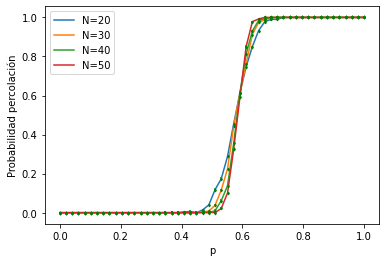

In [10]:

from numpy import zeros,linspace,sqrt,empty,vstack
from numpy.random import random,seed
from matplotlib.pyplot import plot,show,xlabel,ylabel,scatter,xlim,errorbar,figure,ylim,legend

prob=linspace(0,1,50) #es p
N=[20,30,40,50] # Dimensiones de la matriz
G=500 # veces que vamos a repetir la matriz
T_student=2.009575237 #95% para 50 datos

for n in N:
    P=[] # Creamos una lista con la probabilidad de percolacion
    error=[]

    for i in range(len(prob)):
        error_al=T_student*sqrt(prob[i]*(1-prob[i])/G)/sqrt(50) # Calculamos la desviacion tipica para cada punto
        P.append(G_percol(G,n,prob[i]))
        error.append(error_al)
    errorbar(prob, P, yerr=error, fmt='d',color='g',markersize=2.0) # funcion que crea barras de errores
       

    plot(prob,P)
    xlabel("p")
    ylabel("Probabilidad percolación")
legend(['N=20', 'N=30', 'N=40', 'N=50'])
show() 

Se obtiene una gráfica en la que se puede observar la probabilidad de percolación frente a p para distintos de tamaños del sistema. Se observa que la pendiente es más pronunciada para mayores tamaños, como era de esperar.

**Estas curvas se cortan en el punto crítico. Ahora repetimos el proceso anterior en un rango menor de $p$ en torno al punto de corte de las curvas. Los conjuntos de puntos de cada tamaño, de forma ideal caen sobre una línea recta. Luego hacemos un ajuste lineal**



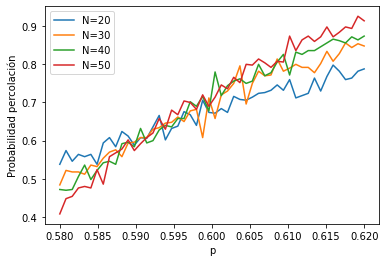

In [12]:

from numpy import zeros,linspace,sqrt,empty,vstack
from numpy.random import random,seed
from matplotlib.pyplot import plot,show,xlabel,ylabel,scatter,xlim,errorbar,figure,ylim
prob=linspace(0.58,0.62,50) #es p
N=[20,30,40,50] # Dimensiones de la matriz
G=500 # veces que vamos a repetir la matriz
MatrizP=zeros(len(prob),float) # Matriz donde cada fila corresponde a la P para unas dimensiones distintas

for n in N:
    P=[] # Creamos una lista con la probabilidad de percolacion

    for i in range(len(prob)):
        P.append(G_percol(G,n,prob[i]))
    MatrizP=vstack((MatrizP,P)) 
    
    plot(prob,P)
    xlabel("p")
    ylabel("Probabilidad percolación")
legend(['N=20', 'N=30', 'N=40', 'N=50'])
show() 

El valor de la pendiente con dimensión 20 es 6.121 y su error 0.015 . El valor de la ordenada es -3.0003 y su error 0.0055
El valor de la pendiente con dimensión 30 es 9.19 y su error 0.023 . El valor de la ordenada es -4.8246 y su error 0.0082
El valor de la pendiente con dimensión 40 es 10.59 y su error 0.021 . El valor de la ordenada es -5.6547 y su error 0.0077
El valor de la pendiente con dimensión 50 es 12.236 y su error 0.025 . El valor de la ordenada es -6.6338 y su error 0.009


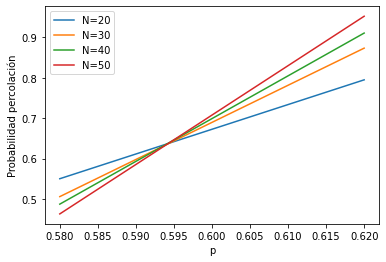

In [34]:

from scipy.optimize import curve_fit
from numpy import diag,log,empty
def func(x,a,b): #funcion lineal para el ajuste
    return a*x + b
t_student=2.009575237 #95% para 50 datos

pendientes=empty(4,float) # Donde guardamos los valores de cada pendiente
ordenadas=empty(4,float)# Donde guardamos los valores de cada ordenada
for i in range(1,5): # En la MatrizP la primera fila son ceros por lo que empezamos en i=1
    a,cov=curve_fit(func,prob,MatrizP[i,:]) # Realizamos el ajuste lineal
    desviacion_estandar=diag(cov)
    error_a=desviacion_estandar[0]*t_student/sqrt(len(prob))
    error_b=desviacion_estandar[1]*t_student/sqrt(len(prob))
    pendientes[i-1]=(a[0])
    ordenadas[i-1]=(a[1])
    plot(prob,a[0]*prob+a[1])
    print("El valor de la pendiente con dimensión" ,N[i-1], "es",round(a[0],3), "y su error",round(error_a,3),". El valor de la ordenada es",round(a[1],4), "y su error",round(error_b,4))

legend(['N=20', 'N=30', 'N=40', 'N=50'])
xlabel("p")
ylabel("Probabilidad percolación")
show()






Los ajustes lineales de las curvas se cortan en un punto, que debería ser cercano al punto crítico.

**6. Las pendientes de cada curva se relacionan con el tamaño mediante el exponente crítico ν mediante la siguiente expresión**
\begin{equation}
    a(L) = mL^{1/ν}
\end{equation}

    
**que tomando logaritmos nos permite obtener el exponente crítico**
\begin{equation}
    log(a) = \frac{1}{ν}log(L) + log(m)
\end{equation}

    
**Mediante un ajuste lineal obtener el valor de $ν^{−1}$ (y su error) y comparad con el resultado
teórico $(ν^{−1} = 3/4)$.**


In [29]:

t_student1=3.182446305 #95% con 4 datos

valores_log_pendientes=list(map(log,pendientes)) #Calculamos el log de las pendientes
valores_log_dimensiones=list(map(log,N)) #Calculamos el log de las dimensiones

a1,cov1=curve_fit(func,valores_log_dimensiones,valores_log_pendientes) # Realizamos el ajuste lineal
desviacion_estandar1=diag(cov1)

error_a1=desviacion_estandar1[0]*t_student1/sqrt(4)
error_b1=desviacion_estandar1[1]*t_student1/sqrt(4)

#Imprimimos el valor de la pendiente y la ordenada del ajuste de los logaritmos
print("El valor de la pendiente es",round(a1[0],3), "y su error",round(error_a1,3),". El valor de la ordenada es",round(a1[1],2), "y su error",round(error_b1,2))



El valor de la pendiente es 0.745 y su error 0.011 . El valor de la ordenada es -0.38 y su error 0.14


Vemos que se obtiene un valor de la pendiente cercano al valor teórico.

**Para obtener la probabilidad de ocupación crítica $p_{c}$ se traza dos lineas horizontales, una por encima del punto de corte de las rectas y otra por debajo. A partir de los ajustes lineales anteriores se obtienen los puntos de corte de cada recta con la linea superior e inferior.**

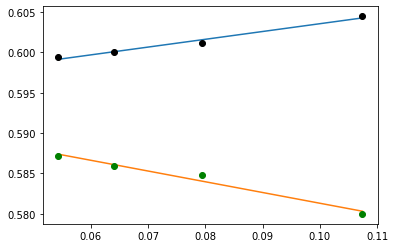

El valor del punto critico es  0.59426  y su error 0.00036
El error relativo es del punto critico es del 0.255 %


In [28]:


Punto_sup=0.70 # linea superior horizontal
Punto_inf=0.55  # linea inferior horizontal
Pc_teorico=0.59274621
# Calculamos los puntos de corte con las rectas

P_corte_arriba=((Punto_sup-ordenadas)/pendientes)
P_corte_abajo=(Punto_inf-ordenadas)/pendientes

periodo=a1[0]

eje_x=N**(-periodo) # Esto es L**(-1/v)

a2,cov2=curve_fit(func,eje_x,P_corte_arriba) # Ajuste lineal de los cortes con la linea superior

a3,cov3=curve_fit(func,eje_x,P_corte_abajo) # Ajuste lineal de los cortes con la linea inferior

Punto_critico=(a2[1]+a3[1])/2  ##Obtenemos el punto crítico

error_pc=abs((a2[1]-a3[1])/2) ##error del punto crítico

plot(eje_x,a2[0]*eje_x+a2[1])

plot(eje_x,a3[0]*eje_x+a3[1])

plot(eje_x,P_corte_abajo,"go")

plot(eje_x,P_corte_arriba,"ko")

show()

print("El valor del punto critico es ",round(Punto_critico,5), " y su error",round(error_pc,5))

print("El error relativo es del punto critico es del",round(abs((Pc_teorico-Punto_critico)/Pc_teorico)*100,3),"%")





Se llega a un valor de probabilidad de ocupación crítica bastante próximo al teórico, por lo que es satisfactorio.